# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [307]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")


### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Objective

The purpose of this  is to find out the used car prices by utilizing the CRISP-DM framework. 
A set of steps are going to be executed in accordance with the framework initially starting with the data understanding, data cleansing, genrating model, evaluating and then deploying the model.
The used car businesses face the challenge of establishing a robust predictive model for determining used car prices. The aim of this project is to accurately estimate the used car prices model which could be utilized by the businesses. The model will enable a transparent and data driven approach to aid to both the business and the consumer, enhancing customer satisfaction and facilitating smoother transactions.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [9]:
df = pd.read_csv('data/vehicles.csv')

In [11]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [13]:
#How many rows and columns does the data file have
df.shape

(426880, 18)

In [15]:
#Info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [17]:
# How many records are null in each column
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [19]:
#Percentage of values missing in each column
df.isna().mean().multiply(100)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

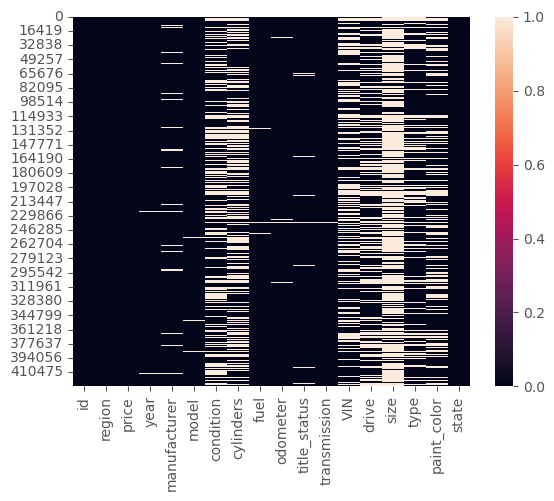

In [21]:
#Heatmap showing the distribution of null values
sns.heatmap(df.isna());

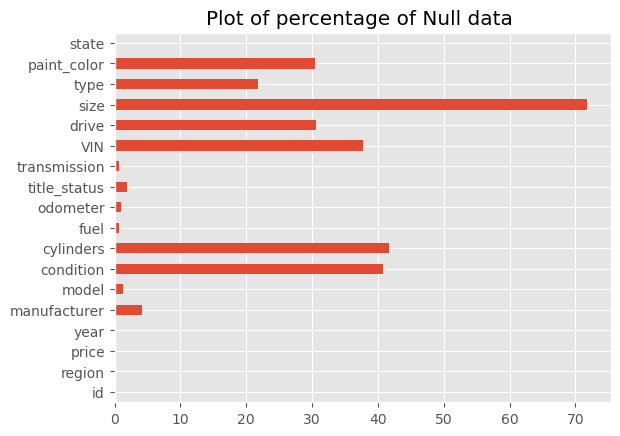

In [22]:
#Plot of null data
fig = df.isna().mean().multiply(100).round(2).plot(kind = 'barh');
fig.set_title("Plot of percentage of Null data ")
fig.plot();

In [25]:
#Num of duplicated rows
df.duplicated().sum()

0

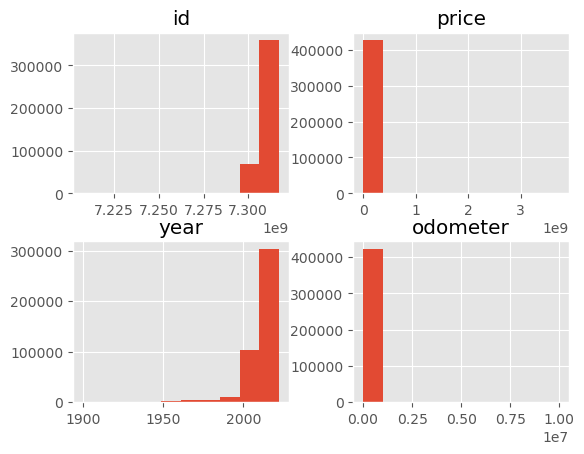

In [27]:
df.hist();

In [29]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [32]:
#Several rows with important features which are all null can be dropped
na_rows = df.index[df['size'].isna() 
                   & df['manufacturer'].isna() 
                   & df['model'].isna() 
                   & df['year'].isna()]
na_rows

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,     10,     11,     12,     13,     14,     15,     16,     17,
           18,     19,     20,     21,     22,     23,     24,     25,     26,
        30184,  33948,  63236,  70037,  72478,  80766,  80767,  80768,  80769,
        83032,  94693, 118854, 121392, 144406, 144572, 159273, 172776, 175630,
       196288, 197407, 197408, 214184, 231771, 267108, 268255, 275017, 283644,
       283884, 295053, 295054, 295055, 295056, 295057, 295058, 331001, 332728,
       368797, 372596, 375886, 402274, 410619],
      dtype='int64')

In [34]:
#df = df.drop(df.index[na_rows], inplace=True)
df = df.drop('id', axis=1)
#reset the index after deletion of rows
df = df.reset_index()
df.head()

,index,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [36]:
df_str = df.select_dtypes(include=object).astype('string')
df_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        426880 non-null  string
 1   manufacturer  409234 non-null  string
 2   model         421603 non-null  string
 3   condition     252776 non-null  string
 4   cylinders     249202 non-null  string
 5   fuel          423867 non-null  string
 6   title_status  418638 non-null  string
 7   transmission  424324 non-null  string
 8   VIN           265838 non-null  string
 9   drive         296313 non-null  string
 10  size          120519 non-null  string
 11  type          334022 non-null  string
 12  paint_color   296677 non-null  string
 13  state         426880 non-null  string
dtypes: string(14)
memory usage: 45.6 MB


In [38]:
#On the high level if we remove columns with all Null/NA values what is left at the end?
# The four coulums remaining are basic column and one of which we would be eliminating to train the model too so this does not leaves us with a lot of data to base a good model
df_not_na = df[df.columns[~df.isna().any()]]
df_not_na

,index,region,price,state
0,0,prescott,6000,az
1,1,fayetteville,11900,ar
2,2,florida keys,21000,fl
3,3,worcester / central MA,1500,ma
4,4,greensboro,4900,nc
...,...,...,...,...
426875,426875,wyoming,23590,wy
426876,426876,wyoming,30590,wy
426877,426877,wyoming,34990,wy
426878,426878,wyoming,28990,wy


#### VIN 
There is 30% data missing for the VIN or Vehicle Identification Number
Based on the understanding of cars and some research even though VIN is an important factor to figure out the history, insuarance and the resale value. For the data modelling perspective it is just a label and won't provide any value to the model.
So the recommended action is `dropping` this column

In [41]:
df = df.drop('VIN', axis=1)
df.head(5)

,index,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### Size & Type
There is missing 71% data however Type seems to be almost the same kind of data so merging the 2 together.


In [44]:
# Combine the Size and Type in a 'type' column
def find_common(row):
    if row['size'] == row['type']:
        return row['size']
    elif row['size'] != None:
        return row['size'] 
    elif row['type'] != None :
        return row['type'] 
    else:
        return None
df['type'] = df.apply(find_common, axis=1)

In [46]:
# type is not empty anymore, we can drop size column
# df['type'].isna().sum()
df = df.drop('size', axis=1)

#### Cylinders 
There is 41% data missing for the Cylinders
If the make and model are available the cylinders can be inferred for metadata of sale, so this column can be dropped too.

In [51]:
#Drop cylinders as 41% data is missing
df = df.drop(['cylinders'], axis=1)

#### Year 
There are about 1300 rows with Year = NaN, year being the important part of the car value seems like these rows can be dropped

In [54]:
df = df[df['year'].notna()].reindex()
df.head()

,index,region,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,gas,57923.0,clean,other,NaN,NaN,white,al
28,28,auburn,22590,2010.0,chevrolet,silverado 1500,good,gas,71229.0,clean,other,NaN,NaN,blue,al
29,29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,gas,19160.0,clean,other,NaN,NaN,red,al
30,30,auburn,30990,2017.0,toyota,tundra double cab sr,good,gas,41124.0,clean,other,NaN,NaN,red,al
31,31,auburn,15000,2013.0,ford,f-150 xlt,excellent,gas,128000.0,clean,automatic,rwd,full-size,black,al


In [56]:
# change the type of year to int
df['year'] = df['year'].astype('int')

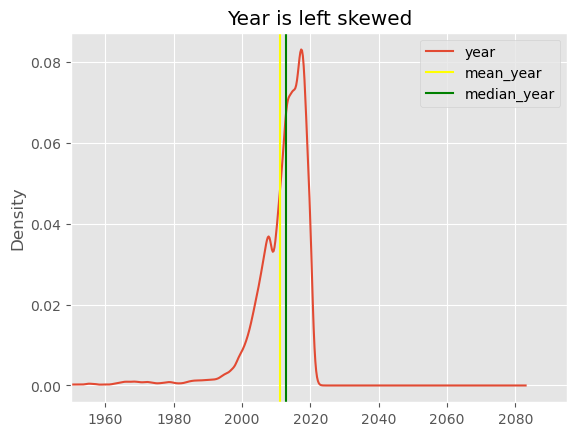

In [58]:
df['year'].plot(kind='kde', xlim = 1950, title="Year is left skewed")
plt.axvline(df['year'].mean(), color = 'yellow', label = "mean_year")
plt.axvline(df['year'].median(), color = 'green', label = "median_year")
plt.legend()

In [59]:
df = df.set_index(df['year']).drop('year', axis=1)

#### Other data
Size,  is an important factor of a car and around 30% of the values are null
type, is also important for resale value 


In [64]:
# Fill condition and cylinder values
def fill_row(row):
    row.fillna(method='bfill', inplace=True)
    row.fillna(method='ffill', inplace=True)
    return row
df = df.apply(fill_row, axis=1)

In [65]:
# check for na values
df.isna().mean().multiply(100)

index           0.0
region          0.0
price           0.0
manufacturer    0.0
model           0.0
condition       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [66]:
def map_values(column, value, allowed_values):
    return column.apply(lambda x: x if x in allowed_values else value)

In [67]:
df['transmission'].value_counts()

transmission
automatic      335433
other           62661
manual          25093
fwd               550
4wd               469
nc                290
white             143
pa                119
va                118
black             105
compact            79
ca                 66
sub-compact        58
custom             58
fl                 51
or                 48
blue               47
silver             44
rwd                34
red                29
co                 25
full-size          24
grey               17
brown              16
ny                 12
wa                 10
il                 10
green               8
wi                  7
sc                  6
hi                  6
tn                  5
oh                  5
ga                  5
nj                  4
tx                  3
ia                  2
ky                  2
dc                  2
yellow              2
orange              2
al                  1
de                  1
mo                  1
mi                 

In [68]:
# Map all other transmission values to 'other' category
allowed_values =['automatic', 'other', 'manual']
df['transmission'] = map_values(df['transmission'], 'other', allowed_values)
df['transmission'].value_counts()

transmission
automatic    335433
other         65149
manual        25093
Name: count, dtype: int64

In [74]:
df['fuel'].value_counts()

fuel
gas         355426
other        30717
diesel       29927
hybrid        5165
electric      1695
             ...  
13471.0          1
74091.0          1
39702.0          1
60623.0          1
501.0            1
Name: count, Length: 1233, dtype: int64

In [76]:
allowed_values =['gas', 'other', 'hybrid', 'diesel','electric']
df['fuel'] = map_values(df['fuel'], 'gas', allowed_values)
df['fuel'].value_counts()

fuel
gas         358171
other        30717
diesel       29927
hybrid        5165
electric      1695
Name: count, dtype: int64

In [78]:
# Looks like a mix up of data, between fuel and condition
# This cleanup can take a bit more precision in a real life scenario 
# however for the purposes of this excercise I am going to drop this
# field as the top values are corrupted
df['condition'].value_counts()

condition
gas          142311
good         121456
excellent    101457
like new      21178
diesel        16467
              ...  
16466.0           1
13471.0           1
74091.0           1
39702.0           1
501.0             1
Name: count, Length: 1233, dtype: int64

In [80]:
df = df.drop('condition', axis=1)

In [82]:
df['odometer'].value_counts()

odometer
clean       3752
100000.0    2263
1.0         2239
0.0         1943
200000.0    1728
            ... 
201471.0       1
104865.0       1
30024.0        1
26306.0        1
26892.0        1
Name: count, Length: 104640, dtype: int64

In [84]:
condition = df['odometer']=='clean'
new_value = 1.0
df.loc[condition, 'odometer'] = new_value

In [86]:
df['odometer'].value_counts()

odometer
1.0         5991
100000.0    2263
0.0         1943
200000.0    1728
150000.0    1603
            ... 
201471.0       1
104865.0       1
30024.0        1
26306.0        1
26892.0        1
Name: count, Length: 104639, dtype: int64

In [88]:
df['odometer'] = df['odometer'].apply(pd.to_numeric, errors='coerce')
df['odometer'] = df['odometer'].fillna(1).astype(float)
df['odometer'].value_counts()

odometer
1.0         6570
100000.0    2263
0.0         1943
200000.0    1728
150000.0    1603
            ... 
89378.0        1
102689.0       1
135958.0       1
150237.0       1
26892.0        1
Name: count, Length: 104630, dtype: int64

In [90]:
df['title_status'].value_counts()

title_status
clean         404334
rebuilt         7109
automatic       6454
salvage         3868
lien            1422
missing          814
other            597
nc               286
manual           264
parts only       198
pa               117
va               116
or                42
fl                41
ca                 9
ga                 3
tn                 1
Name: count, dtype: int64

In [92]:
# clean up title_status
allowed_values =['clean', 'rebuilt', 'salvage', 'lien','missing','parts only','other']
df['title_status'] = map_values(df['title_status'], 'other', allowed_values)
df['title_status'].value_counts()

title_status
clean         404334
other           7930
rebuilt         7109
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [94]:
# clean up transmission
allowed_values =['automatic', 'other', 'manual']
df['transmission'] = map_values(df['transmission'], 'other', allowed_values)
df['transmission'].value_counts()

transmission
automatic    335433
other         65149
manual        25093
Name: count, dtype: int64

In [96]:
df['drive'].value_counts()

drive
4wd       131515
fwd       105138
rwd        58755
white      15662
black      12608
           ...  
ut            93
wv            90
purple        80
wy            74
nd            50
Name: count, Length: 70, dtype: int64

In [98]:
# clean up drive
allowed_values =['4wd', 'fwd', 'rwd']
df['drive'] = map_values(df['drive'], 'fwd', allowed_values)
df['drive'].value_counts()

drive
fwd    235405
4wd    131515
rwd     58755
Name: count, dtype: int64

In [100]:
# clean up paint color
allowed_values =['white', 'black', 'silver', 'blue', 
                 'red', 'grey', 'green','custom', 
                 'brown', 'unknown']
df['paint_color'] = map_values(df['paint_color'], 'unknown', allowed_values)
df['paint_color'].value_counts()

paint_color
unknown    134857
white       78923
black       62661
silver      42835
blue        31156
red         30362
grey        24261
green        7340
custom       6700
brown        6580
Name: count, dtype: int64

In [102]:
df.head()

,index,region,price,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,paint_color,state
year,,,,,,,,,,,,,
2014,27,auburn,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,fwd,white,white,al
2010,28,auburn,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,fwd,blue,blue,al
2020,29,auburn,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,fwd,red,red,al
2017,30,auburn,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,fwd,red,red,al
2013,31,auburn,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,rwd,full-size,black,al


In [104]:
df.shape

(425675, 13)

In [106]:
df.head()

,index,region,price,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,paint_color,state
year,,,,,,,,,,,,,
2014,27,auburn,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,fwd,white,white,al
2010,28,auburn,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,fwd,blue,blue,al
2020,29,auburn,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,fwd,red,red,al
2017,30,auburn,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,fwd,red,red,al
2013,31,auburn,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,rwd,full-size,black,al


In [108]:
#Remove outliers 
#df.drop(df.query('price < 200 | price > 1000000').index, inplace=True)
#df.index[df.query('price < 200 | price > 1000000').index]

In [110]:
# These columns are very large to be one-hot-encoded
df = df.drop(columns=['region','model', 'manufacturer'], axis=1)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [337]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.compose import  TransformedTargetRegressor


def generate_model_comparison (X_train, y_train) :
    numeric_features = ['odometer']
    categorical_features = ['fuel', 'title_status', 'transmission', 'drive', 'type','paint_color','state' ]

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    # Create pipelines for Ridge, Lasso and Linear models
    ridge_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge())
    ])

    lasso_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso())
    ])

    linear_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    # Define hyperparameters grid for each model
    ridge_param_grid = {'regressor__alpha': [0.001, 0.1, 1.0, 10.0]}
    lasso_param_grid = {'regressor__alpha': [0.001, 0.1, 1.0, 10.0]}
    linear_param_grid = {}

    # Create GridSearchCV for Ridge, Lasso and Linear
    ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid)
    lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid)
    linear_grid_search = GridSearchCV(linear_pipeline, linear_param_grid)

    # Fit GridSearchCV on training data for Ridge, Lasso and Linear respectively
    ridge_grid_search.fit(X_train, y_train)
    lasso_grid_search.fit(X_train, y_train)
    linear_grid_search.fit(X_train, y_train)
    
    return [ridge_grid_search, lasso_grid_search, linear_grid_search]



In [134]:
def print_model_comparison(ridge_grid_search, lasso_grid_search, linear_grid_search):
    # Best parameters and scores for each model
    print("Ridge:")
    print("\tBest parameters:", ridge_grid_search.best_params_)
    print("\tBest score:", ridge_grid_search.best_score_)

    print("Lasso:")
    print("\tBest parameters:", lasso_grid_search.best_params_)
    print("\tBest score:", lasso_grid_search.best_score_)

    print("Linear:")
    print("\tBest parameters:", linear_grid_search.best_params_)
    print("\tBest score:", linear_grid_search.best_score_)


In [356]:
from sklearn.metrics import mean_absolute_error

def get_ridge_model_mae(X_train, y_train, X_test, y_test):
    # Ridge Model
    ridge_pipeline.fit(X_train, y_train)
    ridge_train_pred = ridge_pipeline.predict(X_train)
    ridge_test_pred = ridge_pipeline.predict(X_test)

    rfe_train_mae = mean_absolute_error(y_train, ridge_train_pred)
    rfe_test_mae = mean_absolute_error(y_test, ridge_test_pred)

    return [rfe_train_mae, rfe_test_mae]

In [358]:
def get_lasso_model_mae(X_train, y_train, X_test, y_test):
    # Lasso
    lasso_pipeline.fit(X_train, y_train)
    lasso_train_pred = lasso_pipeline.predict(X_train)
    lasso_test_pred = lasso_pipeline.predict(X_test)

    lasso_train_mae = mean_absolute_error(y_train, lasso_train_pred)
    lasso_test_mae = mean_absolute_error(y_test, lasso_test_pred)
    
    return [lasso_train_mae, lasso_test_mae]

In [360]:
 def get_linear_model_mae(X_train, y_train, X_test, y_test):
    #Linear
    linear_pipeline.fit(X_train, y_train)
    linear_train_pred = linear_pipeline.predict(X_train)
    linear_test_pred = linear_pipeline.predict(X_test)

    linear_train_mae = mean_absolute_error(y_train, linear_train_pred)
    linear_test_mae = mean_absolute_error(y_test, linear_test_pred)
    
    return [linear_train_mae, linear_test_mae]


In [373]:
def get_and_print_mae(X_train, y_train, X_test, y_test):
    results = []
    train_mae, test_mae = get_ridge_model_mae(X_train, y_train, X_test, y_test) 
    results.append(["Ridge", train_mae, test_mae])
    print(f"Ridge\n \tTrain: {train_mae}, \n\tTest: {test_mae}") 
    train_mae, test_mae = get_lasso_model_mae(X_train, y_train, X_test, y_test) 
    results.append(["Lasso", train_mae, test_mae])
    print(f"Lasso\n \tTrain: {train_mae}, \n\tTest, {test_mae}")
    train_mae, test_mae = get_linear_model_mae(X_train, y_train, X_test, y_test) 
    results.append(["Linear", train_mae, test_mae])
    print(f"Linear\n \tTrain: {train_mae}, \n\tTest, {test_mae}")
    
    return pd.DataFrame(results, columns=["name","train_mae","test_mae"])
    
    

In [341]:
ridge, lasso, linear = generate_model_comparison (X_train, y_train)
print_model_comparison(ridge, lasso, linear)

Ridge:
	Best parameters: {'regressor__alpha': 10.0}
	Best score: -0.004144692960769891
Lasso:
	Best parameters: {'regressor__alpha': 10.0}
	Best score: -0.0044931910389772066
Linear:
	Best parameters: {}
	Best score: -0.004501743709656436


Ridge
 	Train: 154609.25453668088, 
	Test: 170448.82348333663
Lasso
 	Train: 154648.63979480517, 
	Test, 170472.72848152585
Linear
 	Train: 154702.28144307935, 
	Test, 170522.78857882193


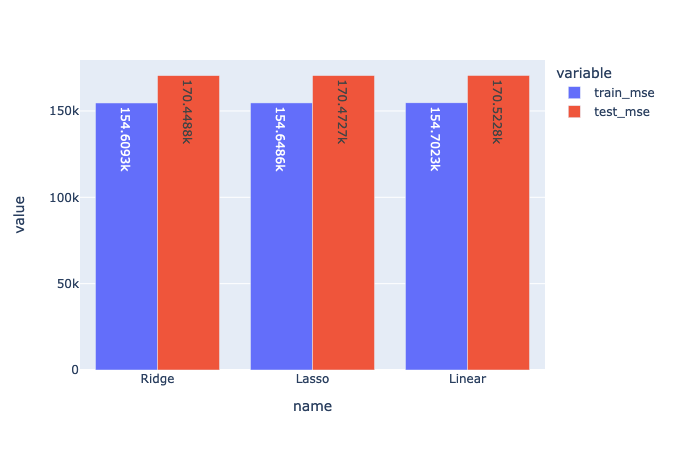

In [344]:
#df_results = get_and_print_mae(X_train, y_train, X_test, y_test)

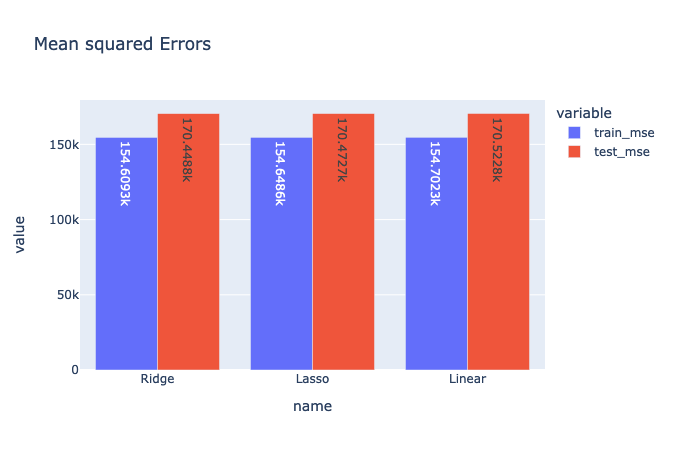

In [346]:
#px.bar(df_results, x=df_results['name'], y=[df_results['train_mse'], 
      #                                       df_results['test_mse']],
      #  text_auto=True, barmode='group',
      #  width=950,
      #  height=450,
      #  title="Mean squared Error"
      # )

In [375]:
df_results = get_and_print_mae(X_train, y_train, X_test, y_test)

Ridge
 	Train: 154609.25453668088, 
	Test: 170448.82348333663
Lasso
 	Train: 154648.63979480517, 
	Test, 170472.72848152585
Linear
 	Train: 154702.28144307935, 
	Test, 170522.78857882193


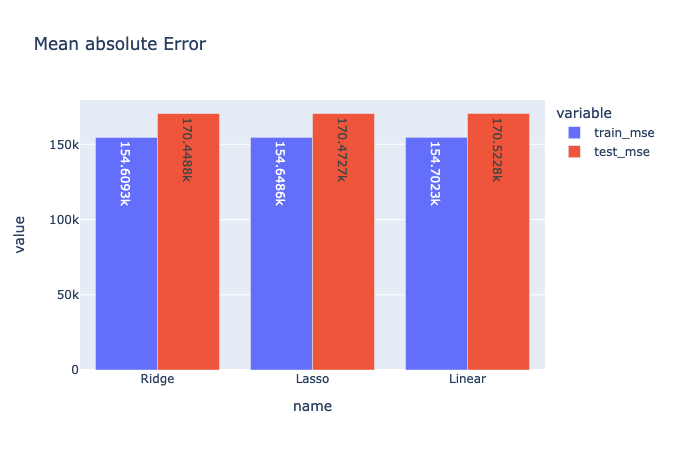

In [371]:
px.bar(df_results, x=df_results['name'], y=[df_results['train_mse'], 
                                            df_results['test_mse']],
       text_auto=True, barmode='group',
       width=950,
       height=450,
       title="Mean absolute Error"
      )

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [322]:
# Average price of the car
y.mean()

75305.64274152817

In [377]:
print(f"Ridge score:", ridge_pipeline.score(X_train, y_train))
print(f"Lasso score:", lasso_pipeline.score(X_train, y_train))

Ridge score: 0.0012449391839116641
Lasso score: 0.0012449636219981075


In [427]:
from sklearn.inspection import permutation_importance
r = permutation_importance(linear_pipeline, X_test, y_test,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}: "
              f"{r.importances_mean[i]: .3f}"
              f" +/- {r.importances_std[i]: .3f}")

type    :  293.073 +/-  3.419
paint_color:  251.201 +/-  3.509
state   :  38.035 +/-  2.057
drive   :  7.059 +/-  0.758
title_status:  2.194 +/-  0.458


In [325]:
# Upon evaluation of the model it clearly seems that 
# type, paint_color, odometer, transmission are important factors 
# in determining the price
# The Ridge model clearly seems to be doing the best
#           Ridge train: 154609.25453668088
#           Ridge test:  170448.82348333663

# However when compared to the mean price value
#   Mean Price = 75305.64274152817
# the model diffrential is much higher
# The next set of re-evaluation would be to remove the cars which are:
# 1. Luxury or collectibles and cost > $50K
# 2. Remove cars which have low value (<500) 
# and rerun the analysis 

In [381]:
df_common = df.query('price > 1000 and price < 45001')
df_common

,index,price,fuel,odometer,title_status,transmission,drive,type,paint_color,state
year,,,,,,,,,,
2014,27,33590,gas,57923.0,clean,other,fwd,white,white,al
2010,28,22590,gas,71229.0,clean,other,fwd,blue,blue,al
2020,29,39590,gas,19160.0,clean,other,fwd,red,red,al
2017,30,30990,gas,41124.0,clean,other,fwd,red,red,al
2013,31,15000,gas,128000.0,clean,automatic,rwd,full-size,black,al
...,...,...,...,...,...,...,...,...,...,...
2019,426875,23590,gas,32226.0,clean,other,fwd,wy,unknown,wy
2020,426876,30590,gas,12029.0,clean,other,fwd,red,red,wy
2020,426877,34990,diesel,4174.0,clean,other,fwd,white,white,wy


In [383]:
X_c = df_common.drop(columns=['price'], axis=1)
y_c = df_common['price']
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
ridge, lasso, linear = generate_model_comparison (X_train, y_train)
print_model_comparison(ridge, lasso, linear)

Ridge:
	Best parameters: {'regressor__alpha': 10.0}
	Best score: 0.3453103732723998
Lasso:
	Best parameters: {'regressor__alpha': 0.1}
	Best score: 0.3453074373425795
Linear:
	Best parameters: {}
	Best score: 0.34529333031624654


Ridge
 	Train: 7245.081824793911, 
	Test: 7244.842696619921
Lasso
 	Train: 7249.423308847166, 
	Test, 7249.255749240097
Linear
 	Train: 7245.052299031658, 
	Test, 7244.837170495198


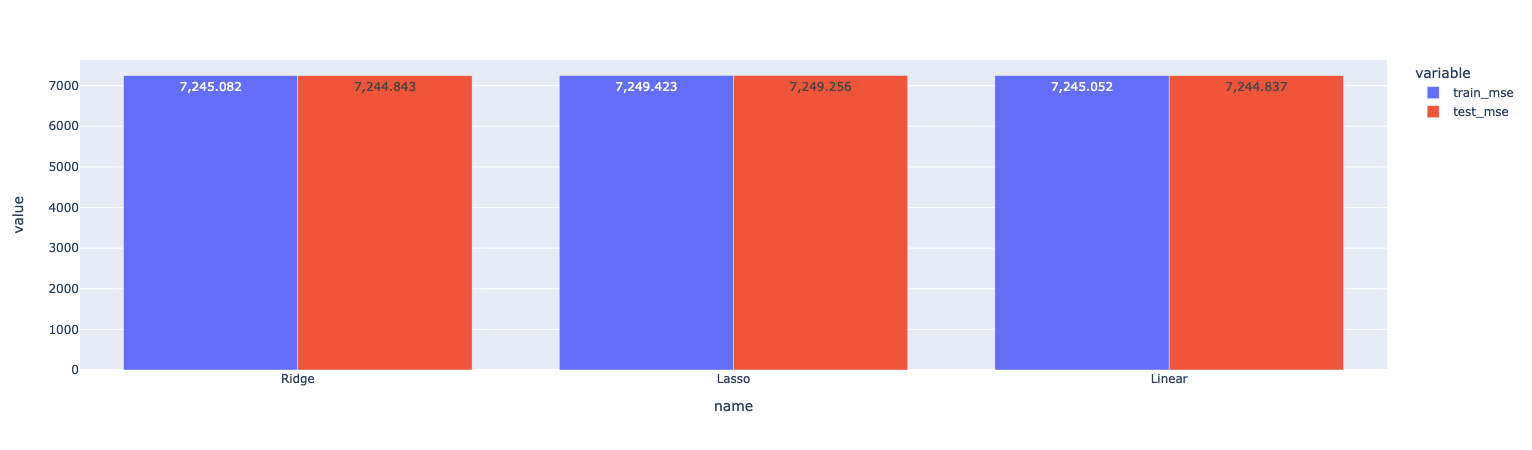

In [328]:
df_results = get_and_print_mae(X_train, y_train, X_test, y_test)
px.bar(df_results, x=df_results['name'], y=[df_results['train_mse'], 
                                            df_results['test_mse']],
       text_auto=True, barmode='group',
       width=850,
       height=450, 
       titel = "Mean average error"
      )

type    :  288.746 +/-  3.402
paint_color:  250.018 +/-  3.487
state   :  34.934 +/-  2.042
drive   :  7.058 +/-  0.755
title_status:  2.189 +/-  0.455


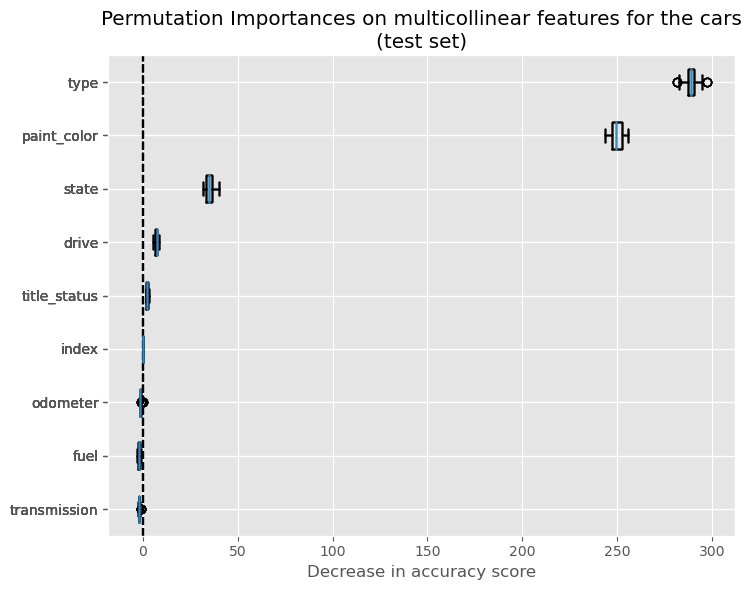

In [415]:
from sklearn.inspection import permutation_importance
fig, ax = plt.subplots(figsize=(7, 6))
ax.set_title("Permutation Importances on multicollinear features for the cars\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
_ = ax.figure.tight_layout()

r = permutation_importance(ridge_pipeline, X_test, y_test,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}: "
              f"{r.importances_mean[i]: .3f}"
              f" +/- {r.importances_std[i]: .3f}")
        perm_sorted_idx = r.importances_mean.argsort()
        ax.boxplot(
        r.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
        )
        ax.axvline(x=0, color="k", linestyle="--")

In [413]:
# Bucket the higher car prices in the luxury category 
df_lux = df.query('price > 45000')
df_lux.head()

,index,price,fuel,odometer,title_status,transmission,drive,type,paint_color,state
year,,,,,,,,,,
2020,158,52990,gas,79.0,clean,other,fwd,white,white,al
2019,204,58977,gas,66368.0,clean,automatic,4wd,white,white,al
2006,220,53000,diesel,160322.0,clean,automatic,fwd,al,unknown,al
2017,243,45900,gas,36083.0,clean,automatic,fwd,white,white,al
1960,280,987654321,gas,999999.0,clean,manual,fwd,al,unknown,al


In [417]:
# Generate X_lux and y_lux 
X_lux = df_lux.drop('price', axis=1)
y_lux = df_lux['price']

type    :  0.002 +/-  0.000
paint_color:  0.000 +/-  0.000
state   :  0.000 +/-  0.000
odometer:  0.000 +/-  0.000


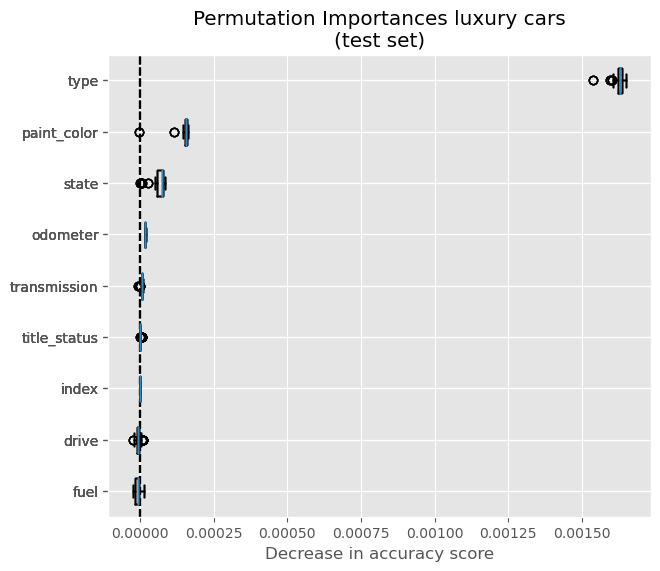

In [425]:
# Plot the permutation imporance for Luxury cars
from sklearn.inspection import permutation_importance
fig, ax = plt.subplots(figsize=(7, 6))
ax.set_title("Permutation Importances luxury cars\n(test set)")
ax.set_xlabel("Decrease in accuracy score")

r = permutation_importance(linear_pipeline, X_lux, y_lux,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}: "
              f"{r.importances_mean[i]: .3f}"
              f" +/- {r.importances_std[i]: .3f}")
        perm_sorted_idx = r.importances_mean.argsort()
        ax.boxplot(
        r.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
        )
        ax.axvline(x=0, color="k", linestyle="--")

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

##### Conclusion

After model testing and evaluation, it seems like the the models are very close however based on this figure below the linear model is very slightly better than ridge.
Using this model and generating the permutation imporance for the feature yield that
For Basic cars, these features are of utmost importance.

    type 
    paint_color
    state   
    drive   
    title_status
    
When using the same model to generate the permutation imporatance of the Luxury cars, a slightly different set of features are important in determining the price of the car
    
    type    
    paint_color
    state   
    odometer